# Finding Heavy Westbound Traffic Indicators on I-94 Interstate Highway

## 1. Introduction

The objective of this project is to *determine the indicatiors of heavy westbound (vehicles moving from east to west) traffic on I-94 Highway*. This data is only of a station located approximately midway between Minneapolis and Saint Paul on I-94. One can download the data from here __[link](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)__.

Data has indicators like *weather type*, *time of the day*, *time of the week* etc. We have to find out what is causing heavier traffic for e.g. *weather* or *time of the day/week*. Below we will look into the data thoroughly.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

traffic_I94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

traffic_I94.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic_I94.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
#using DataFrame.info() look at the details of the dataset
traffic_I94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The *I-94 Traffic Dataset* has *9 columns* and *48204 rows*. Out of 9 columns *4 are strings*, *3 are floats* and *2 are integer data types*. There are *no null values* in the dataset.

## 2. Analyzing Traffic Volume

This traffic data has been recorded at a station located approximately midway between Minneapolis and Saint Paul. As we have briefly mentioned in the introduction this station only records westbound traffic. This means that our analysis is about westbound traffic in the proximity of this particular station. So we should avoid generalizing the results to entire I-94 highway.

Below we will plot a histogram to visualize the distribution of *traffic _volume* column. 

Text(0.5, 1.0, 'Frequency of Traffic Volume')

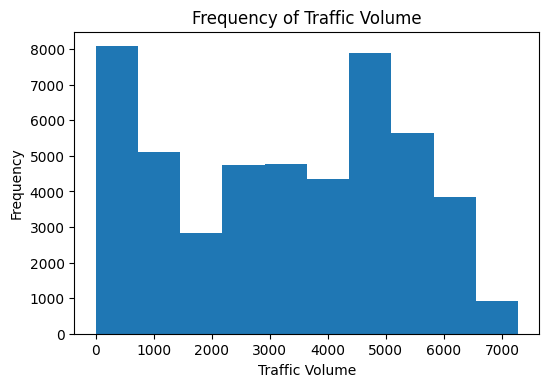

In [4]:
traffic_I94['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.title('Frequency of Traffic Volume')

In [5]:
#using Series.describe() method look at the statistics of the data column
traffic_I94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

According to the *Traffic Volume histogram*, traffic volume between *0-500* and *4500-5000* has maximum frequency(~ 8000 counts). According to the statistics, the mean traffic volume is at *3259* and *75%* of the traffic volume lies close to *5000* and *25%* traffic volume lies close to *1200*. In here peaks likely correspond to peak hours, morning (while commuting to work) and evening (commuting back home). 

## 3. Comparing Traffic Volume for Day and Night

### 3.1 Part 1

Above *traffic volume* histogram shows that traffic is high once during *daytime* and once during *nighttime/evening*. This gives an interesting direction to our analysis. Further we will divide the dataset into two parts.

* Daytime data: from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: from 7 p.m. to 7 a.m. (12 hours)

In [6]:
#transform the *date_time* column to *datetime* using pd.to_datetime()
traffic_I94['date_time']=pd.to_datetime(traffic_I94['date_time'])

#extract the hour from datetime data using Series.dt.hour
hour_data = traffic_I94['date_time'].dt.hour
hour_data.value_counts().sort_index() #check the counts of each hour

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

In [7]:
#group the data between 7 AM and 7 PM & name it daytime_data
daytime_data = traffic_I94[(traffic_I94['date_time'].dt.hour >= 7) & (traffic_I94['date_time'].dt.hour < 19)] 
daytime_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
#group the data between 7 PM & 12 PM and name it nighttime_data_1
nighttime_data_1 = traffic_I94[(traffic_I94['date_time'].dt.hour >= 19) & (traffic_I94['date_time'].dt.hour <= 23 )]
nighttime_data_1.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


In [9]:
#group the data between 12 PM & 7 AM and name it nighttime_data_2
nighttime_data_2 = traffic_I94[(traffic_I94['date_time'].dt.hour >= 0) & (traffic_I94['date_time'].dt.hour < 7 )]
nighttime_data_2.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
15,None,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506
16,None,283.47,0.0,0.0,1,Clear,sky is clear,2012-10-03 01:00:00,321
17,None,281.18,0.0,0.0,1,Clear,sky is clear,2012-10-03 02:00:00,273
18,None,281.09,0.0,0.0,1,Clear,sky is clear,2012-10-03 03:00:00,367
19,None,279.53,0.0,0.0,1,Clear,sky is clear,2012-10-03 04:00:00,814


In [10]:
#combine nighttime_data_1 & nighttime_data_2 using pd.concat() method & name it nighttime_data
combined = [nighttime_data_1, nighttime_data_2]
nighttime_data = pd.concat(combined)
nighttime_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


Above we successfully segregated the daytime and nighttime data into two seperate datasets.

### 3.2 Part 2

We would like to find more details about *Daytime Traffic* and *Nighttime Traffic*. We will begin with plotting a histogram of both the datasets side by side and compare them.

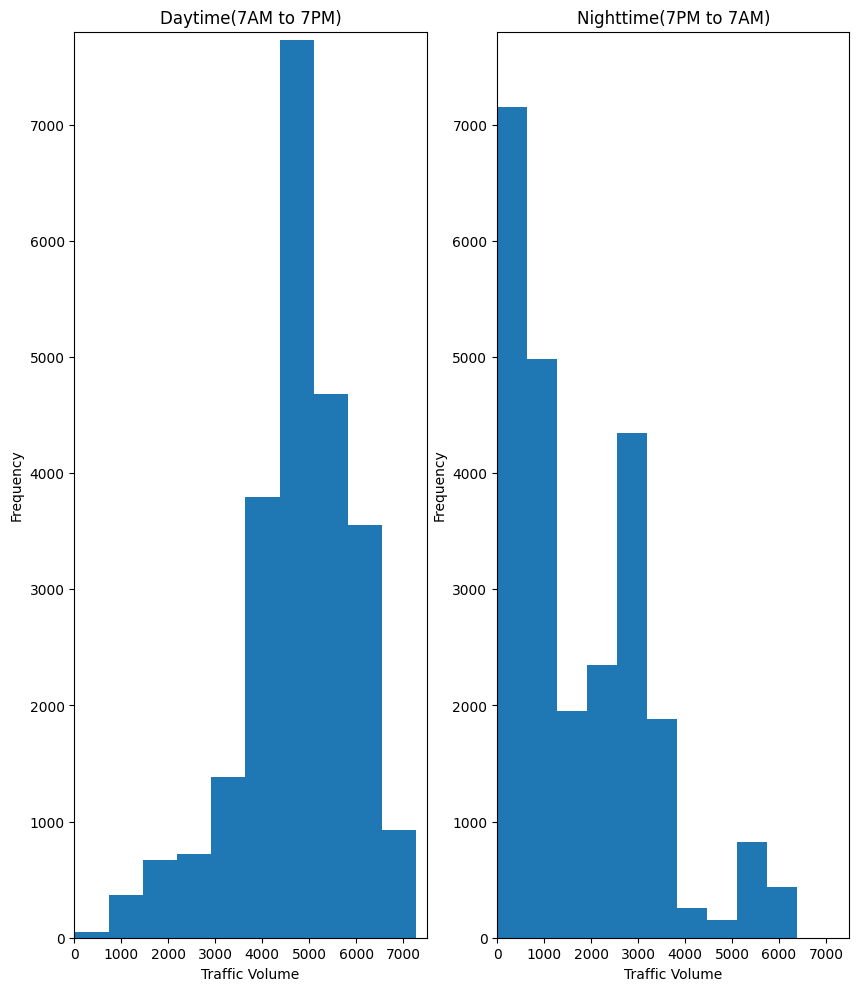

In [11]:
plt.figure(figsize=(10, 12))

#plotting histogram for daytime traffic
plt.subplot(1, 2, 1)
plt.hist(daytime_data["traffic_volume"])
plt.title("Daytime(7AM to 7PM)")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0, 7500])
plt.ylim([0, 7800])

#plotting histogram for nighttime traffic
plt.subplot(1, 2, 2)
plt.hist(nighttime_data["traffic_volume"])
plt.title("Nighttime(7PM to 7AM)")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0, 7500])
plt.ylim([0, 7800])

plt.show()

From the above plot we observe that the *Daytime histogram* looks more `symmetrical (normal distribution)`. The *Nighttime histogram* is `non-symmetrical (positively skewed/right skewed)`. Shape of the Daytime histogram depicts, when the traffic volume is *between 4000 and 5000* frequency is high and on both sides of this traffic volume the frequency keeps on decreasing. Whereas the shape of Nighttime histogram shows, when the traffic volume is *below 1000* the frequency is high. But with increasing traffic volume the frequency count decreases. 

Below we will look into the statistics of both *Daytime and Nighttime* traffic using *Series.describe()* method.

In [12]:
daytime_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
nighttime_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The analysis done on both the data shows that the *average value of daytime traffic volume* is `~ 4700`. Whereas the *average value of night time traffic volume* is `~ 1800`. This indicates that the night time traffic is *considerably lighter* than the daytime traffic. Since our aim is to find out the `indicators of heavy traffic` we can *neglect* the nighttime traffic data and consider only the daytime traffic data.

## 4. Time Indicators of Heavy Traffic Volume

In here we are going to find more about *time* as a heavy traffic indicator. We will categorize *time* into three distinct parameters and find out how the traffic changes according to these parameters.

* **Month** - Is the traffic heavier during certain month(s) of the year?
* **Day of the week** - Is the traffic heavier during certain day(s) of the week?
* **Time of day** - Is the traffic heavier during certain time(s) of the day?

### 4.1 Part 1: Monthly Time Indicators

First we will calculate the heavy traffic volume for each month using *DataFrame.groupby()* method. 

In [14]:
#extract the month from the date_time column using series.dt.month method
daytime_data['month'] = daytime_data['date_time'].dt.month

#calculate the average traffic volume for each month using df.groupby().mean() method
by_month = daytime_data.groupby('month').mean()

#print the average traffic volume for each month
by_month['traffic_volume']

<ipython-input-14-113f61e81717>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

The above data shows the average traffic volume for each month *beginning from January(1) till December(12)*. We will plot this in order to have a better picture of how the traffic varies with each month over a year.

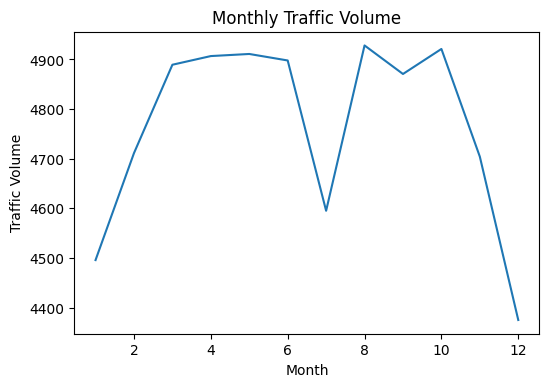

In [15]:
plt.plot(by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Monthly Traffic Volume')
plt.show()

The *monthly average traffic volume graph* shows that the traffic is *low in the month of January* and starts to increase steeply with each month and is `highest in the month of April and May`. After *May it starts decreasing* (may be due to the holiday season) and starts increasing at around July. It reaches a `peak in the month of August, September and October`. It starts *decreasing in the month of November and reaches minimum in the month of December* (probably due to Christmass and New Year vacations).

### 4.2 Part 2: Weekly Time Indicators 

Like average monthly traffic volume, we are going to plot the average weekly traffic volume in here. First we will seperate the weeks from the *date_time* column of the *daytime_data* using the method *Series.dt.dayofweek*. Then we will use *Series.groupby().mean()* function to calculate the average for each day of the week. 

In [16]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek

by_dayofweek = daytime_data.groupby('dayofweek').mean()

by_dayofweek['traffic_volume']#0=Monday, 6=Sunday

<ipython-input-16-90b606d4f602>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Above data shows the average value for each day of the week. Here each number corresponds to a day. for example, *0 is Monday* and *6 is Sunday*. Below we will plot the graph for average weekly traffic volume.

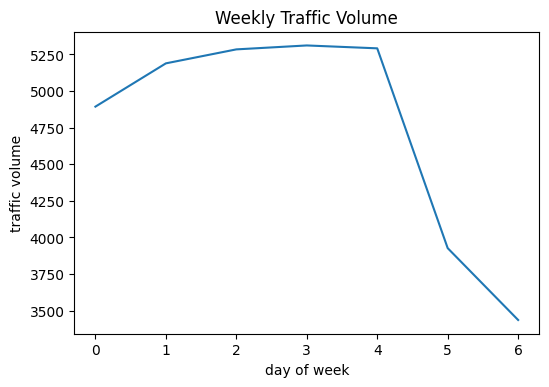

In [17]:
plt.plot(by_dayofweek['traffic_volume'])
plt.xlabel('day of week')
plt.ylabel('traffic volume')
plt.title("Weekly Traffic Volume")
plt.show()

Average traffic volume of each day of the week graph shows that the traffic volume is `high all through the business days (i.e. from Monday till Friday)`. It decreases considerably after Friday and is `very low on weekends (i.e. on Saturday and Sunday)`.  

### 4.3 Part 3: Hourly Time Indicators

In here we will calculate the average traffic volume for each hour of the day. For that first we will seperate the *hour data* from the *date_time* column using *Series.dt.hour* method. We would like to calculate the average traffic volume of *week-day hours* and *week-end hours* seperately. We will name week-day group as *business_day* and consider the days from Monday(0) till Friday(4). We will call week-end group as *weekends* and consider Saturday(5) and Sunday(6). Using *Series.groupby().mean()* method we will calculate the average hourly traffic volume for both the groups.

In [18]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour

business_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4]
weekends = daytime_data.copy()[daytime_data['dayofweek'] >= 5]

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekends = weekends.groupby('hour').mean()

print("Business day")
print(by_hour_business['traffic_volume'])
print("Week-ends")
print(by_hour_weekends['traffic_volume'])

Business day
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
Week-ends
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-18-2fd8773ec297>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We have calculated the average hourly traffic volume (of daytime) for both *business day* and *week-ends* seperately. Further we will plot them side by side in order to compare and understand the hourly traffic volume trends clearly.

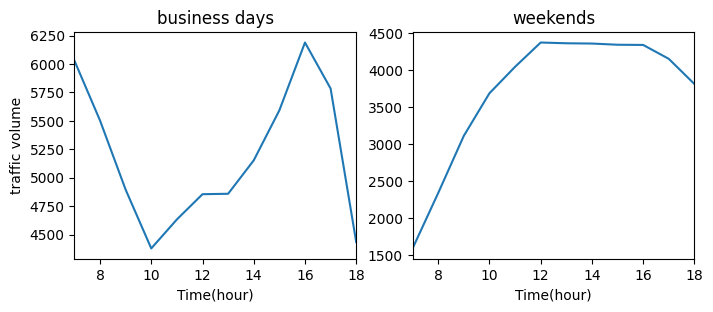

In [19]:
#plot for business days
plt.figure(figsize = (8, 3))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('business days')
plt.xlabel('Time(hour)')
plt.ylabel('traffic volume')

#plot for week-ends
plt.xlim([7, 18])
# plt.ylim([1500, 6250])
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekends['traffic_volume'])
plt.title('weekends')
plt.xlabel('Time(hour)')
plt.xlim([7, 18])
# plt.ylim([1500, 6500])

plt.show()

During *business days* the traffic decreases after 7 AM and till 10 AM and then starts increasing. It `reaches peak at ~ 4PM (may be due to people communting back home)` and again starts decreasing. 

During *weekends* the traffic is `high at around noon (i.e from 12 AM till 4 PM)`. This might be due to the fact that people prefer eating out lunch during weekends. But in general the traffic volume frequency is much higher for weekdays compared to weekends. 

## 5. Weather Indicators

Like *time*, *weather* can also be an indicator of heavy traffic. In our dataset following are *weather columns*:

* temp
* rain_1h
* snow_1h
* clouds_all
* weather_main
* weather_description

Few of the above columns are *numerical* (temp, rain_1h, snow_1h, clouds_all). Below we will explore these columns by checking their *correlation value* with *traffic volume*.

In [20]:
corr_temp = daytime_data['traffic_volume'].corr(daytime_data['temp'])
print("temp vs traf_vol: ", round(corr_temp,4))

temp vs traf_vol:  0.1283


In [21]:
corr_rain = daytime_data['traffic_volume'].corr(daytime_data['rain_1h'])
print("rain vs traf_vol: ", round(corr_rain,4))

rain vs traf_vol:  0.0037


In [22]:
corr_snow = daytime_data['traffic_volume'].corr(daytime_data['snow_1h'])
print("snow vs traf_vol: ", round(corr_snow,4))

snow vs traf_vol:  0.0013


In [23]:
corr_clouds = daytime_data['traffic_volume'].corr(daytime_data['clouds_all'])
print("clouds vs traf_vol: ", round(corr_clouds,4))

clouds vs traf_vol:  -0.0329


All the three weather indicators show positive correlation except *cloud_all* with the traffic volume. The strongest correlation value is between column *temp* (temperature) and *traffic_volume*, i.e. ~ 0.1283. Further we will plot these two columns to get a clear picture of *how temperature affects the traffic volume*.

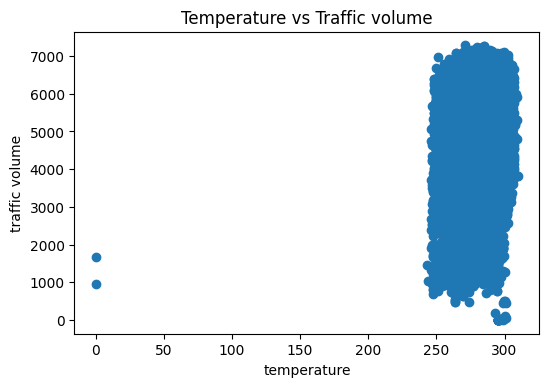

In [24]:
plt.scatter(daytime_data['temp'], daytime_data['traffic_volume'])
plt.xlabel('temperature')
plt.ylabel('traffic volume')
plt.title('Temperature vs Traffic volume')
plt.show()

The `temp(temperature)` column shows that the traffic is high when the temperature is above 250 K. This indicates that when the temperature is pleasant, the traffic volume is high. But the correlation graph is more like a straight line rather than a linear one. So it is hard to say if this column is a reliable traffic indicator.

Other weather columns *rain_1h*, *snow_1h*, *clouds_all* do not show a strong correlation with the *traffic volume* column. So these may not be reliable indicators of *heavy traffic volume*.

###  5.1 Weather Types

In here we will look into the *categorical weather related* columns *weather_main* and *weather_description*. First we will calculate the *average traffic volume* associated with each unique value in these two columns using *dataframe.groupby().mean()* method. Then we will plot the *horizontal bar plot* for both the columns against traffic volume.

In [25]:
#calculate the mean as an aggregate function for weather_main column
by_weather_main = daytime_data.groupby('weather_main').mean()

In [26]:
#calculate the mean as an aggregate function for weather_description column
by_weather_description = daytime_data.groupby('weather_description').mean()

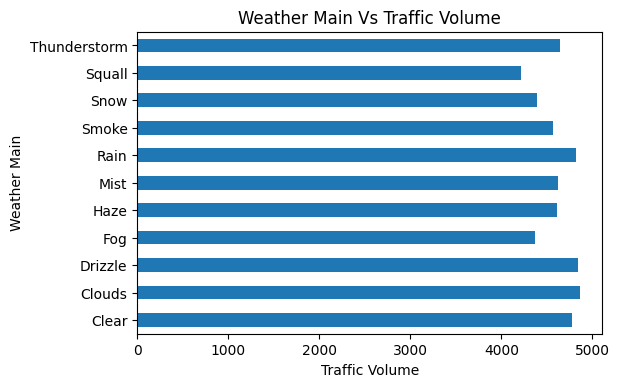

In [27]:
#horizontal bar plot for weather_main column
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Main')
plt.title("Weather Main Vs Traffic Volume")
plt.show()

Here all the weather types have traffic volume above 4000 and less than 5000. It is hard to point at any one as heavy traffic volume indicator. Atleast five of them look equally likely.

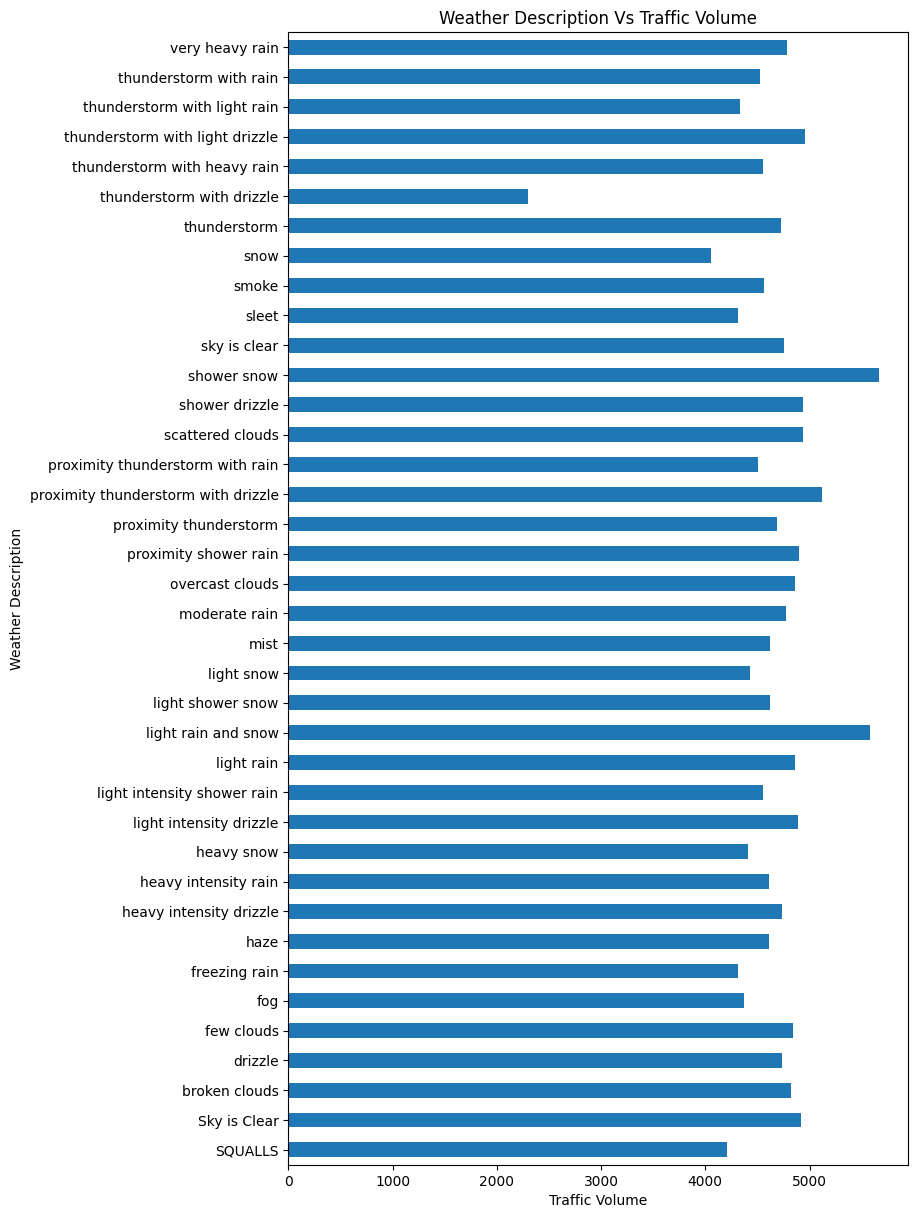

In [28]:
#horizontal bar plot for weather_description column
by_weather_description['traffic_volume'].plot.barh(figsize=(8, 15))
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.title('Weather Description Vs Traffic Volume')
plt.show()

From the above graph we observe that there are a few *weather types* which exceed the traffic volumes by 5000. These are `Shower snow` ,`Light rain and snow` and `Proximity thunderstorm with drizzle`. We can list these as heavy traffic volume indicators.

## Conclusions
**We have drawn four conclusions from all the analysis we have done so far :-**

* Traffic is *high* during `daytime`(7AM to 7PM). And *low* during `nighttime`(7PM to 7AM). So we have considered only *daytime* data for the indicators of heavy traffic volume analysis.

* Traffic is *high* during `business days`(Monday to Friday) than `weekends`(Saturday and Sunday). During `business days`, traffic is *high* at `7 AM` (when people are commuting to work) and at `4 PM` (when people are commuting back home).

* Traffic volume is *low* during `Winter`, i.e. from 'November till February'. It is *highest* during `Spring` i.e. in the month of 'April and May'. It is also *high* during `Summer`, i.e. in the month of 'August and September'.

* Among the *weather* indicators, analysis done on the numeric indicators (e.g. *temperature*) is not conclusive. Among the categorical indicators, `light rain and snow` , `shower snow` & `Proximity thunderstorm with drizzle` lead to *heavy traffic volume*.

##  Additional Analysis

## 6. Night Time Data Analysis of Heavy Traffic Indicators

In here we are going to analyze the *time* and *weather* as indicators of heavy traffic volume for the night time data. 

### 6.1 Time as an indicator of Heavy Traffic Volume

First we will plot the traffic volume through out the year and observe how it behaves with every month. We will follow the same methods as that for the daytime data.

In [29]:
#extract the data for each month using Series.dt.month method
nighttime_data['month'] = nighttime_data['date_time'].dt.month

#take the average for the data
night_month = nighttime_data.groupby('month').mean()

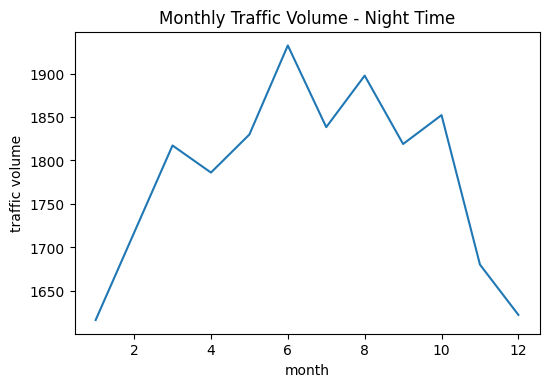

In [30]:
#plot the monthly traffic volume for the night time data
plt.plot(night_month['traffic_volume'])
plt.xlabel('month')
plt.ylabel('traffic volume')
plt.title('Monthly Traffic Volume - Night Time')
plt.show()

*Monthly Traffic Volume* graph shows that the traffic starts to increase as winter ceases and spring begins. Stays almost constant thoughout the summer and fall peaking slightly in the month of June. Decreases as winter begins.

Below we will calculate and plot the average of *weekly traffic volume* data.

In [31]:
#extract weekly data using Series.dt.dayofweek method
nighttime_data['dayofweek'] = nighttime_data['date_time'].dt.dayofweek
#calculate the average value using df.groupby().mean() method
night_dayofweek = nighttime_data.groupby('dayofweek').mean()

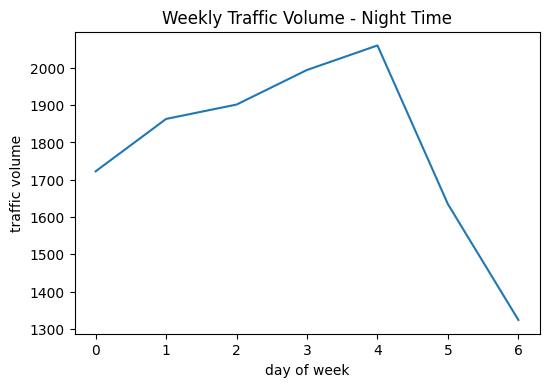

In [32]:
#plot the graph for traffic volume of average weekly data
plt.plot(night_dayofweek['traffic_volume'])
plt.xlabel('day of week')#0 is Monday & 6 is Sunday
plt.ylabel('traffic volume')
plt.title('Weekly Traffic Volume - Night Time')
plt.show()

The weekly traffic volume graph shows that the traffic volume on Friday nights peak and is low on Saturday and Sunday nights.

Below we will calculate the *average hourly* traffic volume data for the night-time. In here we will calculate the mean hour seperately for business-day nights and week-end nights.

In [33]:
#extract the hourly night time traffic volume using Series.dt.hour method
nighttime_data['hour'] = nighttime_data['date_time'].dt.hour

#seperate the hourly traffic volume data for business-day nights and weekend nights
business_night = nighttime_data.copy()[nighttime_data['dayofweek']<=4]
weekends_night = nighttime_data.copy()[nighttime_data['dayofweek']>=5]

In [34]:
#calculate the average value for both both business-day & weekend nights
business_night_hour = business_night.groupby('hour').mean()
weekends_night_hour = weekends_night.groupby('hour').mean()

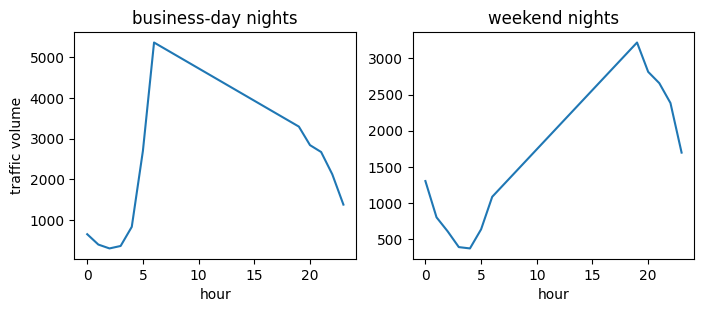

In [35]:
#plot the hourly traffic volume data for business-day nights & weekend nights
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(business_night_hour['traffic_volume'])
plt.title('business-day nights')
plt.xlabel('hour')
plt.ylabel('traffic volume')
plt.subplot(1,2,2)
plt.plot(weekends_night_hour['traffic_volume'])
plt.title('weekend nights')
plt.xlabel('hour')
plt.show()

The hourly traffic volume graph looks little confusing because of the hours column. We have to consider the time between 7PM (19:00) till 7AM (7:00). It looks like during the business-day nights the traffic volume is high at around 7AM, i.e. early in the morning. During weekend nights the traffic volume peaks during evening just after 7PM. 

### 6.2 Weather as an Indicator of  Heavy Traffic Volume

Here first we want to check the correlation between the *traffic volume* and the numerical weather data columns like how we did for the daytime data. 

In [36]:
nighttime_temp = nighttime_data['traffic_volume'].corr(nighttime_data['temp'])
print(round(nighttime_temp, 4))

0.094


In [37]:
nighttime_rain = nighttime_data['traffic_volume'].corr(nighttime_data['rain_1h'])
print(round(nighttime_rain, 4))

-0.013


In [38]:
nighttime_snow = nighttime_data['traffic_volume'].corr(nighttime_data['snow_1h'])
print(round(nighttime_snow, 4))

-0.0075


In [39]:
nighttime_clouds = nighttime_data['traffic_volume'].corr(nighttime_data['clouds_all'])
print(round(nighttime_clouds, 4))

0.0128


We do not observe a strong correlation between numerical weather columns and the traffic volume.

Further we will analyze both the *weather main* and *weather description* columns for the night-time data and observe how the weather influences the night-time traffic volume. First, let us consider *weather main* column and calculate it's mean value. 

In [40]:
#calculate the average value for the weather_main column using Series.groupby().mean()
night_weather_main = nighttime_data.groupby('weather_main').mean()

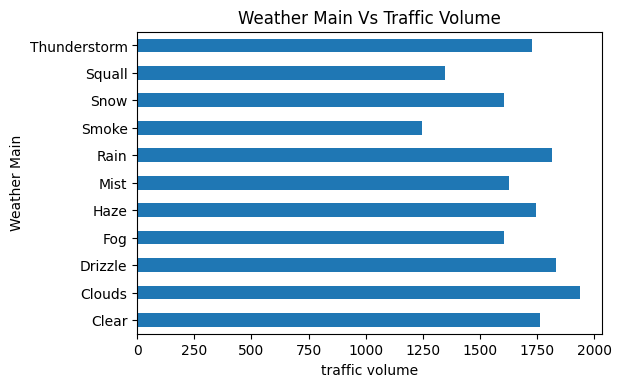

In [41]:
#plot the graph for different weather types & corresponding traffic volume
night_weather_main['traffic_volume'].plot.barh()
plt.xlabel('traffic volume')
plt.ylabel('Weather Main')
plt.title("Weather Main Vs Traffic Volume")
plt.show()

According to the graph, there is not much difference in the *weather main* for the night time traffic.

Let us explore *weather description* column.

In [42]:
#calculate the mean value of weather_description column using Series.groupby().mean() methos
night_weather_description = nighttime_data.groupby('weather_description').mean()

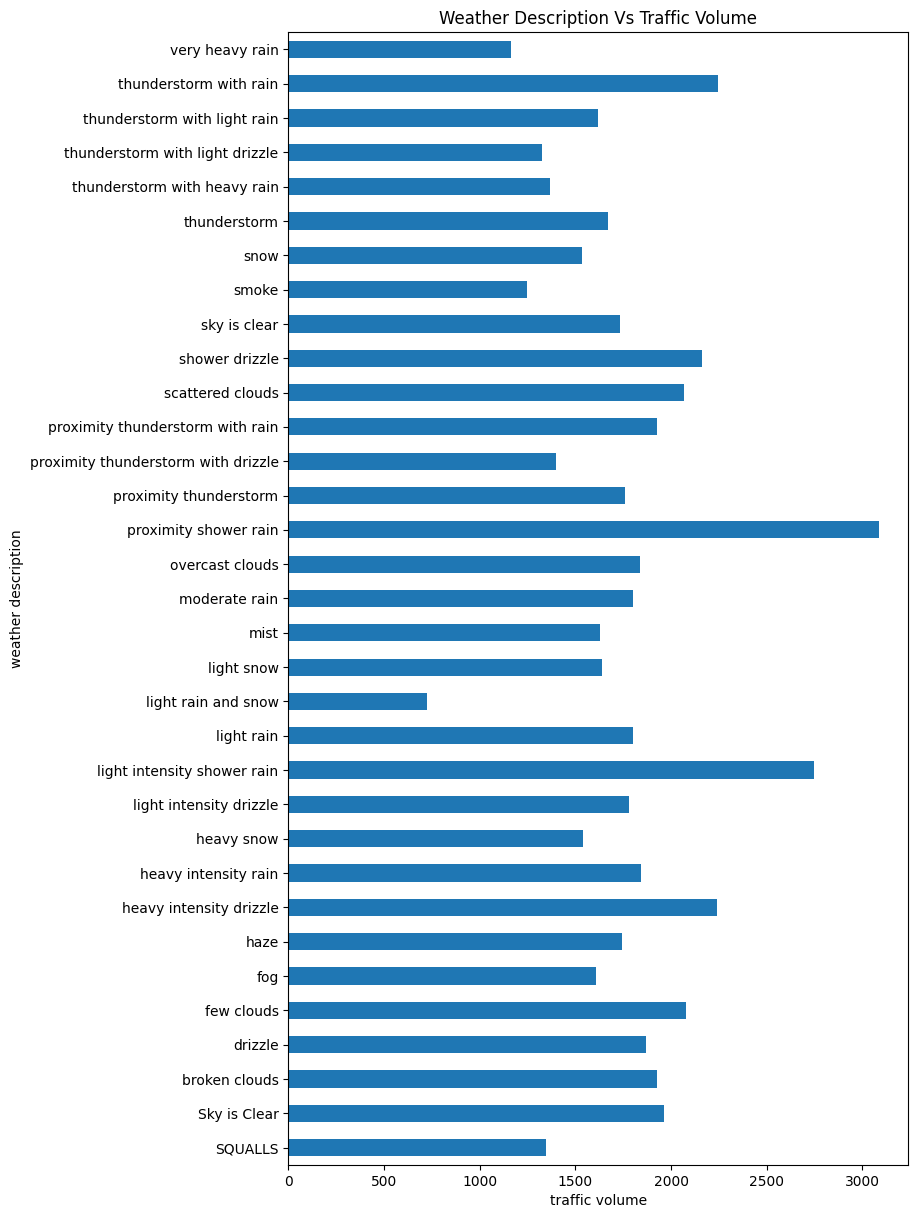

In [43]:
#plot the mean value of weather-description vs. traffic volume
night_weather_description['traffic_volume'].plot.barh(figsize=(8, 15))
plt.xlabel('traffic volume')
plt.ylabel('weather description')
plt.title("Weather Description Vs Traffic Volume")
plt.show()

*Weather description* column depicts that *proximity shower rain* causes maximum traffic congestion. Next highest is the *light intensity shower rain* and then comes *thunderstorm with rain*. These three standout compared to other weather descriptions. 

## 7. Comparing Traffic Volume: Holidays Vs Normal Days

In here we will check how traffic looks like during *holidays* compared to normal days.

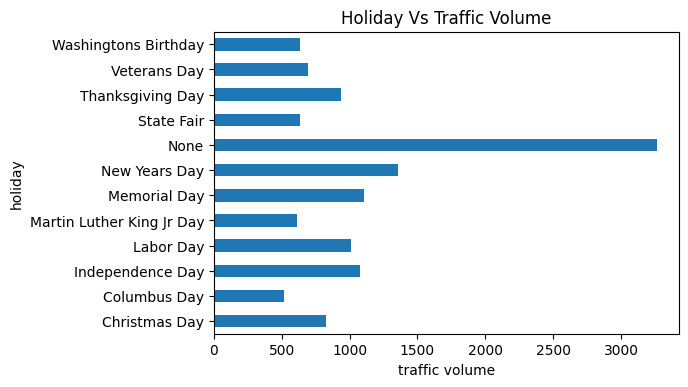

In [44]:
#calculate the average of holiday column
holiday_list = traffic_I94.groupby('holiday').mean()

#plot horizontal bar plot for the mean holiday
holiday_list['traffic_volume'].plot.barh()
plt.xlabel('traffic volume')
plt.title('Holiday Vs Traffic Volume')
plt.show()

From the above graph it is clear that during holidays traffic is less by atleast 50% compared to normal days.

## Conclusions on Additional Analysis

- Looking at the above analysis we draw following conlusions for the night-time traffic data:-

 * `Monthly night time data` shows that the traffic is *high* during *Summer Months*, than *Winter months*.
 * `Weekly night time data` shows that the traffic is *high during business-day nights than weekend nights*. It is high especially on *Friday nights*.
 *  `Hourly night time data` shows that during business-day nights the traffic is high during *early morning hours* & during weekend nights it is high during *evenings*.
 *  Among the `weather_descriptions`, *proximity shower rain*, *light intensity shower rain* and *thunderstorm with rain* leads to high traffic volumes.
 
- During holidays traffic volume is *less* by atleast 50% compared to normal days